Enter the coordinate limit (e.g., 200):  200
Enter the number of computers (e.g., 10):  4
Enter the number of nodes (e.g., 500):  300


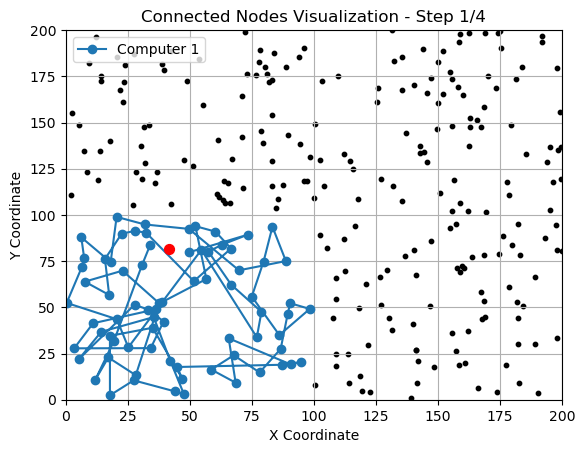

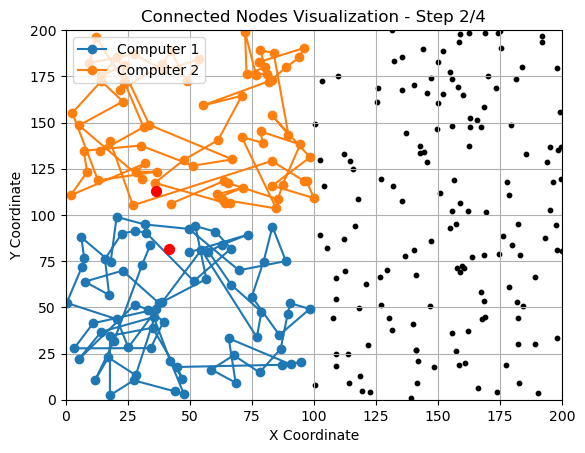

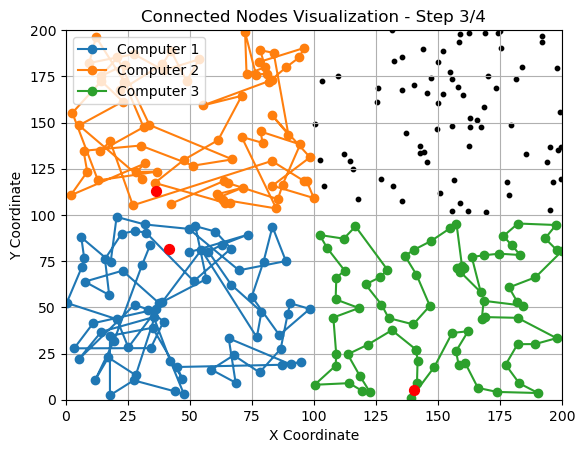

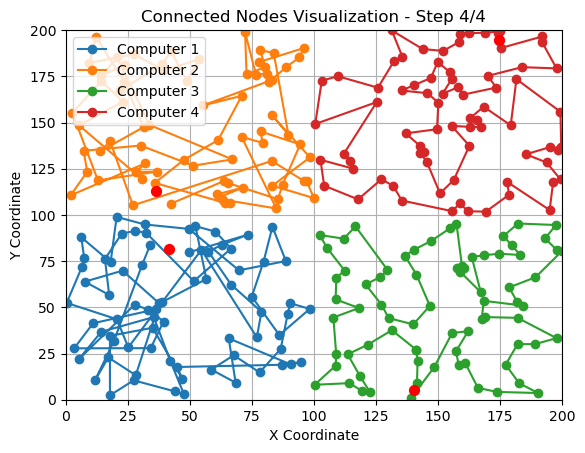

In [ ]:
### import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs
import numpy as np  # Importing NumPy for numerical operations
from math import dist  # Importing the Euclidean distance function from math
import math  # Importing math for mathematical functions
from python_tsp.heuristics import solve_tsp_simulated_annealing  # Importing the TSP solver using simulated annealing

# Get user inputs for the coordinate limit, number of computers, and number of nodes
coordinate = int(input("Enter the coordinate limit (e.g., 200): "))  # Limit for the random coordinates
computers = int(input("Enter the number of computers (e.g., 10): "))  # Number of sections (or computers) to divide nodes into
nodes = int(input("Enter the number of nodes (e.g., 500): "))  # Total number of nodes to generate for the problem

# Function to generate random node coordinates within specified limits
def generate_nodes():
    full_coordinates = np.empty((0, 2), float)  # Create an empty array to hold (x, y) coordinates
    
    # Define sections to split the coordinate space based on the number of computers
    x_section_arr = np.linspace(0, coordinate, 3)  # Create x divisions
    y_section_arr = np.linspace(0, coordinate, num=int(3 + math.ceil((computers - 4) / 2)))  # Create y divisions

    if computers % 2 == 0:  # If the number of computers is even
        for x_section in range(len(x_section_arr) - 1):
            if computers == 2:  # Special case for 2 computers
                # Generate coordinates within the x-section and random y-coordinates
                x_nodes_coordintes = np.random.uniform(
                    int(x_section_arr[x_section]), 
                    int(x_section_arr[x_section + 1]),  
                    size=(int(nodes / computers), 1)  # Number of nodes per section
                )
                y_nodes_coordintes = np.random.uniform(0, coordinate, size=(int(nodes / computers), 1))
                col = np.column_stack((x_nodes_coordintes, y_nodes_coordintes))  
                full_coordinates = np.append(full_coordinates, col, axis=0)  
            else: 
                for y_section in range(len(y_section_arr) - 1):  # For multiple y-sections
                    x_nodes_coordintes = np.random.uniform(
                        int(x_section_arr[x_section]),   
                        int(x_section_arr[x_section + 1]),  
                        size=(int(nodes / computers), 1)  
                    )
                    y_nodes_coordintes = np.random.uniform(
                        int(y_section_arr[y_section]),   
                        int(y_section_arr[y_section + 1]),  
                        size=(int(nodes / computers), 1)  
                    )
                    col = np.column_stack((x_nodes_coordintes, y_nodes_coordintes))  
                    full_coordinates = np.append(full_coordinates, col, axis=0)  

    else:  # If the number of computers is odd
        for x_section in range(len(x_section_arr) - 1):  
            for y_section in range(len(y_section_arr) - 2):  # Generate coordinates for each section
                x_nodes_coordintes = np.random.uniform(
                    int(x_section_arr[x_section]),  
                    int(x_section_arr[x_section + 1]),  
                    size=(int(nodes / computers), 1)  
                )
                y_nodes_coordintes = np.random.uniform(
                    int(y_section_arr[y_section]),  
                    int(y_section_arr[y_section + 1]),  
                    size=(int(nodes / computers), 1)  
                )
                col = np.column_stack((x_nodes_coordintes, y_nodes_coordintes))  
                full_coordinates = np.append(full_coordinates, col, axis=0)  

        # Additional nodes for the last section if the number of computers is odd
        x_nodes_coordintes = np.random.uniform(0, coordinate, size=(int(nodes / computers), 1))  
        y_nodes_coordintes = np.random.uniform(int(y_section_arr[len(y_section_arr) - 2]),
                                                  int(y_section_arr[len(y_section_arr) - 1]),
                                                  size=(int(nodes / computers), 1)) 
        col = np.column_stack((x_nodes_coordintes, y_nodes_coordintes))  
        full_coordinates = np.append(full_coordinates, col, axis=0)  

    return full_coordinates  # Return the array of generated node coordinates

# Function to calculate the distance matrix between nodes
def calcute_distance(arr):
    distances = np.empty((0, len(arr)), float)  # Initialize an array for storing distances
    for row in range(len(arr)):  
        temp_dist = np.empty((0, len(arr)), float)  # Temp array for distances of one row
        for col in range(len(arr)):  
            point_1 = arr[row][0], arr[row][1]  # Select first point
            point_2 = arr[col][0], arr[col][1]  # Select second point
            temp_dist = np.insert(temp_dist, col, dist(point_1, point_2))  # Calculate distance and insert
        distances = np.r_[distances, [temp_dist]]  # Concatenate distances rows
    return distances  # Return completed distance matrix

# Function for optimizing the entire path
def optimize_whole_path(all_coordinates):
    distance_matrix = calcute_distance(all_coordinates)  # Get the distance matrix for all coordinates
    permutation, _ = solve_tsp_simulated_annealing(distance_matrix)  # Solve the TSP using simulated annealing
    return all_coordinates[permutation]  # Return optimized order of coordinates

# Function to plot the paths and nodes
def plot_path(step_connections, all_coordinates, step, total_steps):
    plt.figure()  # Create a new figure for plotting
    for i, connections in enumerate(step_connections):  # Loop through all computer connections
        x_temp = [coord[0] for coord in connections]  # Extract x-coordinates
        y_temp = [coord[1] for coord in connections]  # Extract y-coordinates
        plt.plot(x_temp, y_temp, marker='o', label=f'Computer {i + 1}')  # Plot connections with a label

        # Mark the midpoint of each connection with a red dot
        if len(x_temp) > 1:  
            mid_x = (x_temp[0] + x_temp[-1]) / 2  
            mid_y = (y_temp[0] + y_temp[-1]) / 2  
            plt.scatter(mid_x, mid_y, color='red', s=50, zorder=5)  

    # Plot all node coordinates
    plt.scatter(all_coordinates[:, 0], all_coordinates[:, 1], color='black', s=10)  
    plt.title(f'Connected Nodes Visualization - Step {step}/{total_steps}')  # Title of the plot
    plt.xlabel('X Coordinate')  # X-axis label
    plt.ylabel('Y Coordinate')  # Y-axis label
    plt.legend(loc='upper left')  # Legend position
    plt.xlim(0, coordinate)  # Set x-axis limit
    plt.ylim(0, coordinate)  # Set y-axis limit
    plt.grid(True)  # Enable grid
    plt.show()  # Display the plot

# Main execution block
if __name__ == '__main__':  
    all_coordinates = generate_nodes()  # Generate random coordinates for the nodes
    full_coordinates = np.array_split(all_coordinates, computers)  # Split coordinates among computers
    connected_nodes = []  # List to hold paths for each computer

    for i in range(computers):  # Iterate through each computer
        temp_arr = full_coordinates[i]  # Get the segment of nodes for the current computer
        
        if i < math.floor(computers / 2):  # For the first half of computers
            # Ensure we consider connections to future sections.
            temp_future_arr = full_coordinates[i + int(math.floor(computers / 2))]
            distance_betwenn_two_phases = calcute_distance(temp_arr)  # Distance for current nodes
            distance_future = calcute_distance(temp_future_arr)  # Distance for future nodes
            distance_matrix = distance_betwenn_two_phases + distance_future  # Combine distance matrices

            permutation, _ = solve_tsp_simulated_annealing(distance_matrix)  # Solve TSP
            connected_nodes.append(temp_arr[permutation])  # Store the optimized path
            plot_path(connected_nodes, all_coordinates, step=i + 1, total_steps=computers)  # Plot intermediate paths
            
        else:  # For the second half of computers
            distance_matrix = calcute_distance(temp_arr)  # Calculate distance matrix for the current segment
            permutation, _ = solve_tsp_simulated_annealing(distance_matrix)  # Solve TSP for current nodes
            connected_nodes.append(temp_arr[permutation])  # Store the optimized path
            plot_path(connected_nodes, all_coordinates, step=i + 1, total_steps=computers)  # Plot intermediate paths

    # Optimize the entire path after obtaining all individual paths
    final_path = optimize_whole_path(all_coordinates)

    # Plot the optimized entire path
    plt.figure()  # Create a new figure for the final plot
    x_temp = final_path[:, 0]  # Extract x-coordinates from the optimized path
    y_temp = final_path[:, 1]  # Extract y-coordinates from the optimized path
    plt.plot(x_temp, y_temp, marker='o', color='blue', label='Global Optimized Path')  # Plot the final optimized path

    # Label nodes
    plt.scatter(all_coordinates[:, 0], all_coordinates[:, 1], color='black', s=10)  
    plt.title('Optimized Path for All Nodes')  # Title for the final plot
    plt.xlabel('X Coordinate')  # X-axis label
    plt.ylabel('Y Coordinate')  # Y-axis label
    plt.legend(loc='upper left')  # Legend position
    plt.xlim(0, coordinate)  # Set x-axis limit
    plt.ylim(0, coordinate)  # Set y-axis limit
    plt.grid(True)  # Enable grid
    plt.show()  # Display the final plot